# Path on a surface defined from a set of known points
O. Kaufmann, 2020.

Calculate a curve distance between two xyz points on a surface known through a set of points

Solution proposed by Delforge from this question:
    https://gis.stackexchange.com/questions/180154/how-to-calculate-a-curve-distance-between-two-xyz-points

**Remark:** <br> accuracy could be improved if the interpolator parameters were used to compute the integral instead of a linear approximation between steps along the path

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from scipy import interpolate

## 0. Create a point xyz data set

In [2]:
# Generate x and y (5,5) grids

xx, yy = np.mgrid[-1.0:1.0:5j, -1.0:1.0:5j]

# array of coordinates.
xy = np.column_stack([xx.flat, yy.flat])

# generate 2d gaussian point data

mu = np.array([0.0, 0.0])
sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)
z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (5, 5) grid.
zz = z.reshape(xx.shape)

## 1. Create a surface model from the point data set

In [3]:
# fit model

model = interpolate.CloughTocher2DInterpolator(xy, z)

# generate a new grid with higher resolution (20,20)

xnew, ynew = np.mgrid[-1.0:1.0:20j, -1.0:1.0:20j]

# conversion to array of coordinates

xynew = np.column_stack([xnew.flat, ynew.flat])

# predict z for the new grid

znew = model(xynew).reshape(20,20)

## 2. Use the model to calculate trajectory

In [4]:
# select two points from xy coordinates

pt1 = np.append(xy[10], z[10])
pt2 = np.append(xy[22], z[22])

# create xy trajectory between points

nstep = 30 # number of point to define the trajectory

x_traj = np.linspace(pt1[0], pt2[0], nstep)
y_traj = np.linspace(pt1[1], pt2[1], nstep)

# get z from model

z_traj = model(list(zip(x_traj, y_traj)))

## 3. Compute trajectory length

In [5]:
# euclidean distance in the xy plane between pt1 and pt2

dist_xy = np.linalg.norm(pt1[:-1] - pt2[:-1])

# difference of elevation along trajectory

z_diff = np.diff(z_traj)

# step distance

step = dist_xy /(nstep - 1)

# xyz trajectory length

dist_xyz = np.sum(np.sqrt(step**2 + z_diff**2))

print(dist_xyz) # <--- RESULT 

1.461631654715015


## 4. Plot results

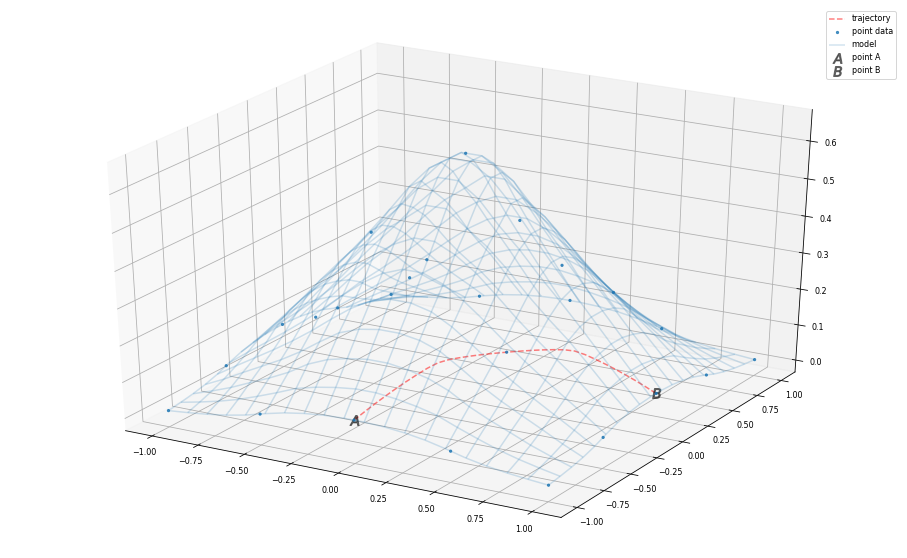

In [8]:
plt.rcParams['font.size'] = 8.

fig = plt.figure(figsize=(16,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx, yy, zz, alpha=0.8, s=5., label='point data')
ax.plot_wireframe(xnew, ynew, znew, alpha=0.2, label='model')
ax.scatter(pt1[0],pt1[1], pt1[2], color='k', alpha=0.5, marker='$A$', s=100., label='point A')
ax.scatter(pt2[0],pt2[1], pt2[2], color='k', alpha=0.5, marker='$B$', s=100., label='point B')
ax.plot(x_traj, y_traj, z_traj, 'r--', label='trajectory', alpha=0.5)

ax.legend()
plt.show()

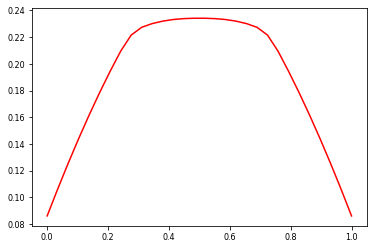

In [9]:
plt.plot(x_traj, z_traj, '-r')